In [89]:
import numpy as np
import pandas as pd
import seaborn as sns

# statistical calculations
import scipy.stats as stats

In [90]:
# data set 1
a, b = 2, 5
n = 100
np.random.seed(123)
data1 = np.random.beta(a, b, size=n)
print("data1 (3 first values):", data1[:3])

# data set 2
a, b = 10, 5
n = 100
np.random.seed(123)
data2 = np.random.beta(a, b, size=n)
print("data2 (3 first values):", data2[:3])

data1 (3 first values): [0.079743   0.1001085  0.02233009]
data2 (3 first values): [0.48190481 0.46384746 0.50741647]


# statistical calculations

`SciPy` is a collection of mathematical algorithms and convenience functions. With its help, it is possible to see, for example, the structure within the data. Lets check the normality of the generated data sets. To do this, we will use `stats.normaltest(data)` function. If data is distributed normally, its distribution should have a bell shape:

<img src="https://cdn.scribbr.com/wp-content/uploads/2020/10/standard-normal-distribution-1024x633.png" alt="drawing" width="400"/>

Performing the D’Agostino and Pearson’s test, we test the null hypothesis that a sample comes from a normal distribution. We can try to reject it by looking at the p-value which is a measure of the probability that an observed difference could have occurred just by random chance.

In [91]:
print ('----- DATA 1 -----')
# Run the  D’Agostino and Pearson’s test for sample x1
k, p = stats.normaltest(data1)
# Print the result
print(f"k={k}, p={p}")

----- DATA 1 -----
k=8.073871217619669, p=0.01765148066399961


To understand whether we can reject the null hypothesis we compare p-value with $\alpha$ equalled to 0.05.

In [92]:
alpha = 0.05

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


Now we can do the same thing with the second data set.

In [93]:
print ('----- DATA 2 -----')
# Run the  D’Agostino and Pearson’s test for sample x1
k, p = stats.normaltest(data2)
# Print the result
print(f"k={k}, p={p}")

alpha = 0.05

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

----- DATA 2 -----
k=12.63024082162971, p=0.0018087479546733938
The null hypothesis can be rejected


More info on statistical computing: https://docs.scipy.org/doc/scipy/tutorial/index.html

# practical example (t-test)

In [8]:
data = pd.read_csv("housing.csv")
housing = pd.read_csv("housing.csv")

In [7]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Let's select a couple of columns to work with. We can check whether there is a connection between the space of the apts and their price.

$H_0:$ there is no difference in prices of big and small apts, and  
$H_1:$ there is difference in prices of big and small apts.

In [9]:
housing = housing[['Id', 'LotArea', 'SalePrice']]

Split `LotArea` into two categories (because we do need them)

In [15]:
housing['Lot10000'] = np.where(housing['LotArea'] >= 10000, '>= 10k','< 10k')

Now let's look at the assumptions which are:  
* equal sizes of samples 
* normally distributed samples
* equal vairances 


First, sample size.

In [12]:
housing['Lot10000'].value_counts()

< 10k     837
>= 10k    623
Name: Lot10000, dtype: int64

Not the best but it is possible to work with. Now we can check the normality, important to look at the prices separately.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

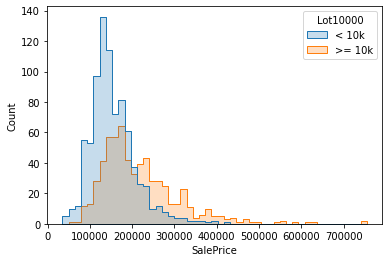

In [23]:
sns.histplot(data=housing, x="SalePrice", hue="Lot10000", element="step")

And use the normaility test.

In [28]:
k, p = stats.normaltest(housing[housing['Lot10000'] == '< 10k']['SalePrice'])
print(f"k={k}, p={p}")

k=187.55716472897922, p=1.8727472085191523e-41


In [29]:
k, p = stats.normaltest(housing[housing['Lot10000'] == '>= 10k']['SalePrice'])
print(f"k={k}, p={p}")

k=228.40224118963133, p=2.529784332125132e-50


As the p-value is really small, we can say that the distribution is not normal.  

Finally, we look at the variances.

In [33]:
# Run the Levene test
stat, p = stats.levene(housing[housing['Lot10000'] == '< 10k']['SalePrice'], housing[housing['Lot10000'] == '>= 10k']['SalePrice'])

# Print the result
print(f"k={stat}, p={p}")

k=94.46902054979866, p=1.1140065967298026e-21


The problem is we can reject the hypothesis we wouldn't like to reject. Therefore, we cannot use the t-test with this case. Let's try and split our data a bit differently and see if it changes anything.

In [53]:
housing['Lot9k'] = np.where(housing['LotArea'] >= 9500, '>= 9.5k','< 9.5k')

In [54]:
housing['Lot9k'].value_counts()

< 9.5k     733
>= 9.5k    727
Name: Lot9k, dtype: int64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

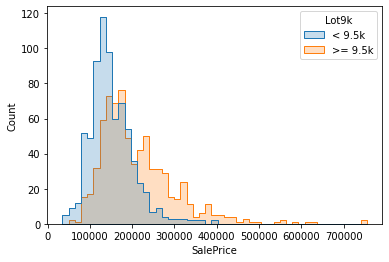

In [55]:
sns.histplot(data=housing, x="SalePrice", hue="Lot9k", element="step")

In [58]:
k, p = stats.normaltest(housing[housing['Lot9k'] == '< 9.5k']['SalePrice'])
print(f"k={k}, p={p}")

k=154.25200661289847, p=3.1959674886773177e-34


In [59]:
k, p = stats.normaltest(housing[housing['Lot9k'] == '>= 9.5k']['SalePrice'])
print(f"k={k}, p={p}")

k=271.73514601990087, p=9.850601996301897e-60


In [61]:
# Run the Levene test
stat, p = stats.levene(housing[housing['Lot9k'] == '< 9.5k']['SalePrice'], housing[housing['Lot9k'] == '>= 9.5k']['SalePrice'])
print(f"k={stat}, p={p}")

k=87.94978604995664, p=2.4743939075747325e-20


So, we really can't run the t-test here, and sometimes this happens! Let's try some other data :)

# students data (t test again)

In [68]:
students = pd.read_csv("student-mat.csv")

We take gender and final grade so:  
$H_0:$ there is no difference in girls and boys grades, and  
$H_1:$ boys and girls receive different grades.

In [69]:
df = students[['sex', 'G3']]

Assumptions again :)

In [72]:
df['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

<AxesSubplot:xlabel='G3', ylabel='Count'>

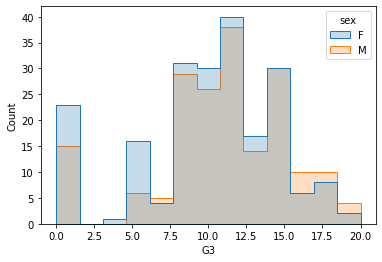

In [73]:
sns.histplot(data=df, x="G3", hue="sex", element="step")

Let's drop out zeros as outliers.

In [80]:
df = df[df['G3'] != 0]

<AxesSubplot:xlabel='G3', ylabel='Count'>

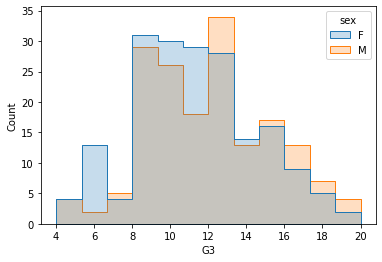

In [81]:
sns.histplot(data=df, x="G3", hue="sex", element="step")

In [82]:
k, p = stats.normaltest(df[df['sex'] == 'F']['G3'])
print(f"k={k}, p={p}")

k=2.323816262090783, p=0.31288857850171053


In [83]:
k, p = stats.normaltest(df[df['sex'] == 'M']['G3'])
print(f"k={k}, p={p}")

k=3.7174901419749595, p=0.15586811109986803


In [85]:
stat, p = stats.levene(df[df['sex'] == 'F']['G3'], df[df['sex'] == 'M']['G3'])
print(f"k={stat}, p={p}")

k=0.6144552033049334, p=0.4336379490863752


The distribution is normal but the assumption with variances is violated so we choose Welch's t-test.

In [86]:
stats.ttest_ind(df[df['sex'] == 'F']['G3'], df[df['sex'] == 'M']['G3'], equal_var=False)

Ttest_indResult(statistic=-1.9386213026002412, pvalue=0.05334760933558726)

*p-value* is higher than 0.05, so we can't reject the null hypothesis.

# prices and space (correlation)

Let's get back to the first dataset and try looking at the correlation.  

Assumptions:
* linear relationship
* normally distributed samples

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

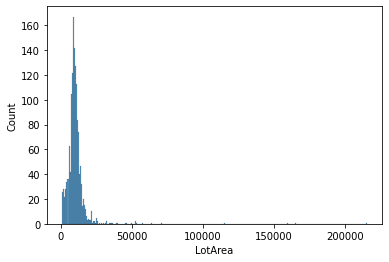

In [100]:
sns.histplot(housing['LotArea'])

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

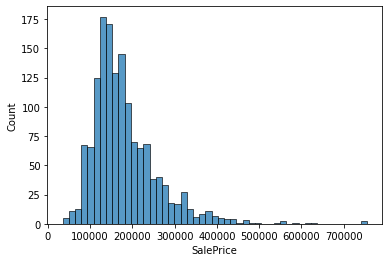

In [99]:
sns.histplot(housing['SalePrice'])

In [136]:
h1 = housing[housing['LotArea'] < 17500]
h1 = h1[h1['LotArea'] > 2500]
h1 = h1[h1['SalePrice'] < 300000]

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

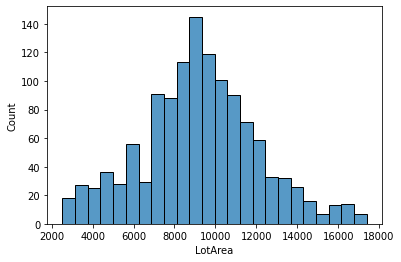

In [137]:
sns.histplot(h1['LotArea'])

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

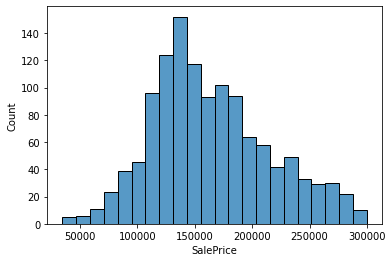

In [138]:
sns.histplot(h1['SalePrice'])

In [139]:
k, p = stats.normaltest(h1['LotArea'])
print(f"k={k}, p={p}")

k=4.103927789861775, p=0.12848232985853206


In [140]:
k, p = stats.normaltest(h1['SalePrice'])
print(f"k={k}, p={p}")

k=40.453482535898935, p=1.6430011992948376e-09


<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

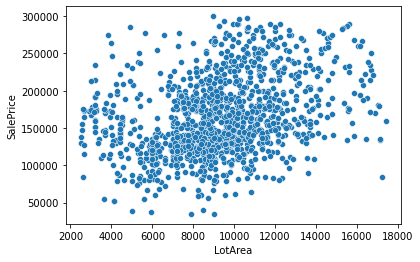

In [144]:
sns.scatterplot(data=h1, x="LotArea", y="SalePrice")

In [148]:
r,p = stats.pearsonr(h1['LotArea'], h1['SalePrice'])
print(r,p)

0.33192141963896377 2.239241594993562e-33
